![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [120]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [121]:
# Start coding here
# Use as many cells as you need
crimes.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object

## 1. Which hour has the highest frequency of crimes?

0    11
1    16
2    12
3     6
4     9
Name: hour, dtype: int64


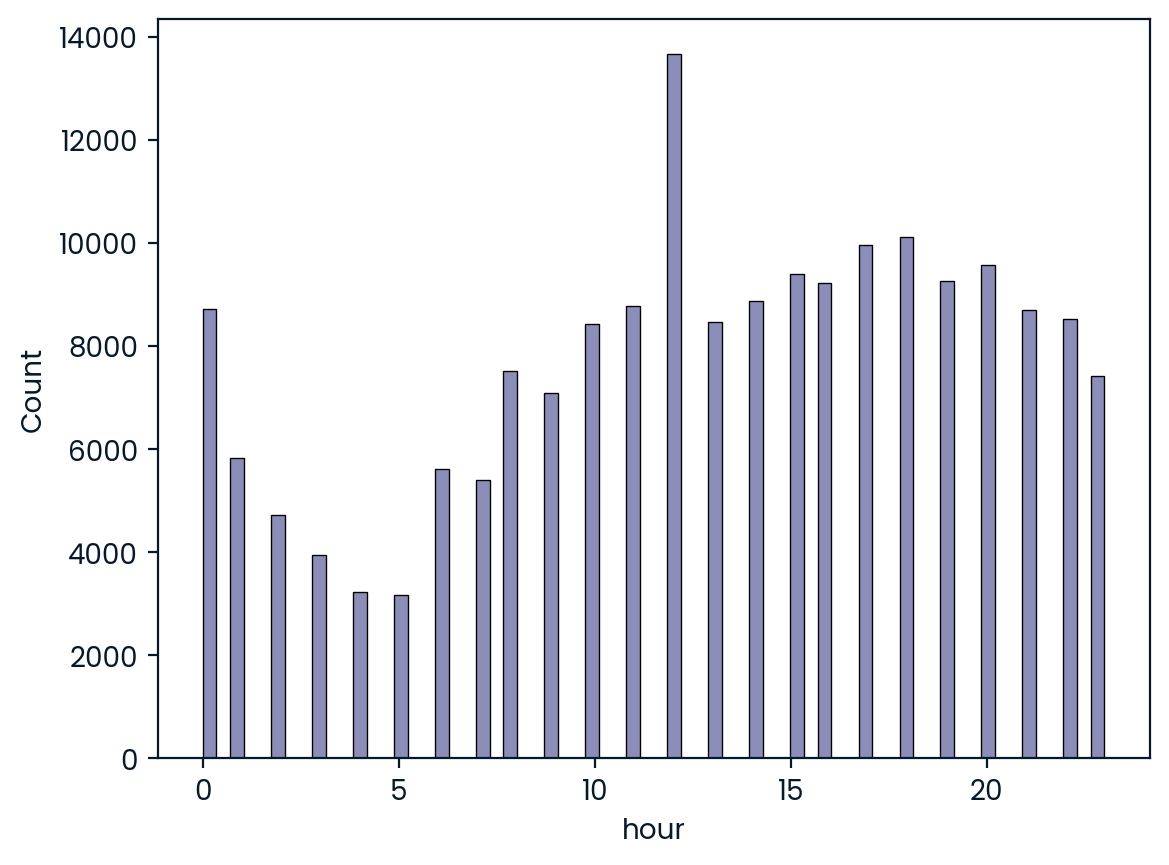

12

In [122]:
# Extracting the hours
crimes["hour"] = crimes["TIME OCC"].astype(int) // 100
print(crimes["hour"].head())

# Plotting the frequencies
sns.histplot(data=crimes, x="hour")
plt.show()

# Storing the hour as a variable
peak_crime_hour = crimes["hour"].value_counts().index[0]
peak_crime_hour

## 2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

In [123]:
# Subsetting for night hours
night_hours = [22, 23, 0, 1, 2, 3]
crimes["is_night_crime"] = crimes["hour"].isin(night_hours)
# print(crimes[crimes["is_night_crime"]].tail(20))
# print(crimes[crimes["is_night_crime"]]["hour"].value_counts())

# Counting crime by area
crime_by_area = crimes.groupby("AREA NAME")["is_night_crime"].agg("count").sort_values(ascending=False)

peak_night_crime_location = crime_by_area.index[0]
print(peak_night_crime_location)

Central


## 3. Identify the number of crimes committed against victims of different age groups.

In [124]:
# Creating bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Adding a new column to the crimes DataFrame containing binned age bracket values
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], labels=age_labels, bins=bins)

# Counting crimes by victim age group
victim_ages = data=crimes["Age Bracket"].value_counts()
victim_ages.head()

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
Name: Age Bracket, dtype: int64

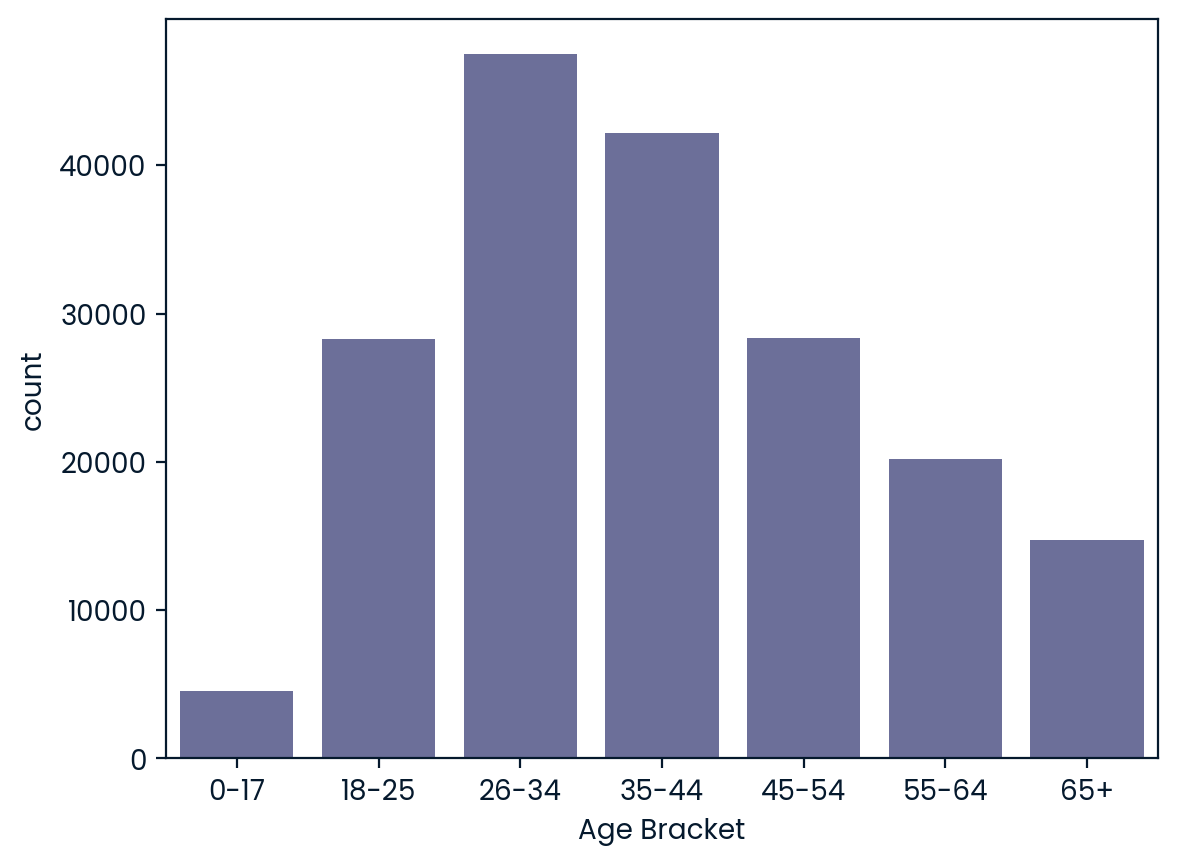

In [125]:
sns.countplot(data=crimes, x="Age Bracket")
plt.show()